In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFE5B4'

In [3]:
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/World%20Happiness/happiness_score_dataset.csv"
data = pd.read_csv(url)

In [4]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
data.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [7]:
data=data.rename(columns = {'Happiness.Rank':'Happ.Rank', 'Happiness.Score':'Happ.Score', 'Economy..GDP.per.Capita.':'GDP', 
                     'Health..Life.Expectancy.':'Life.Expect','Trust..Government.Corruption.':'Trust.to.Gov', 'Dystopia.Residual':'Dystop.Res'})

In [8]:
data.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


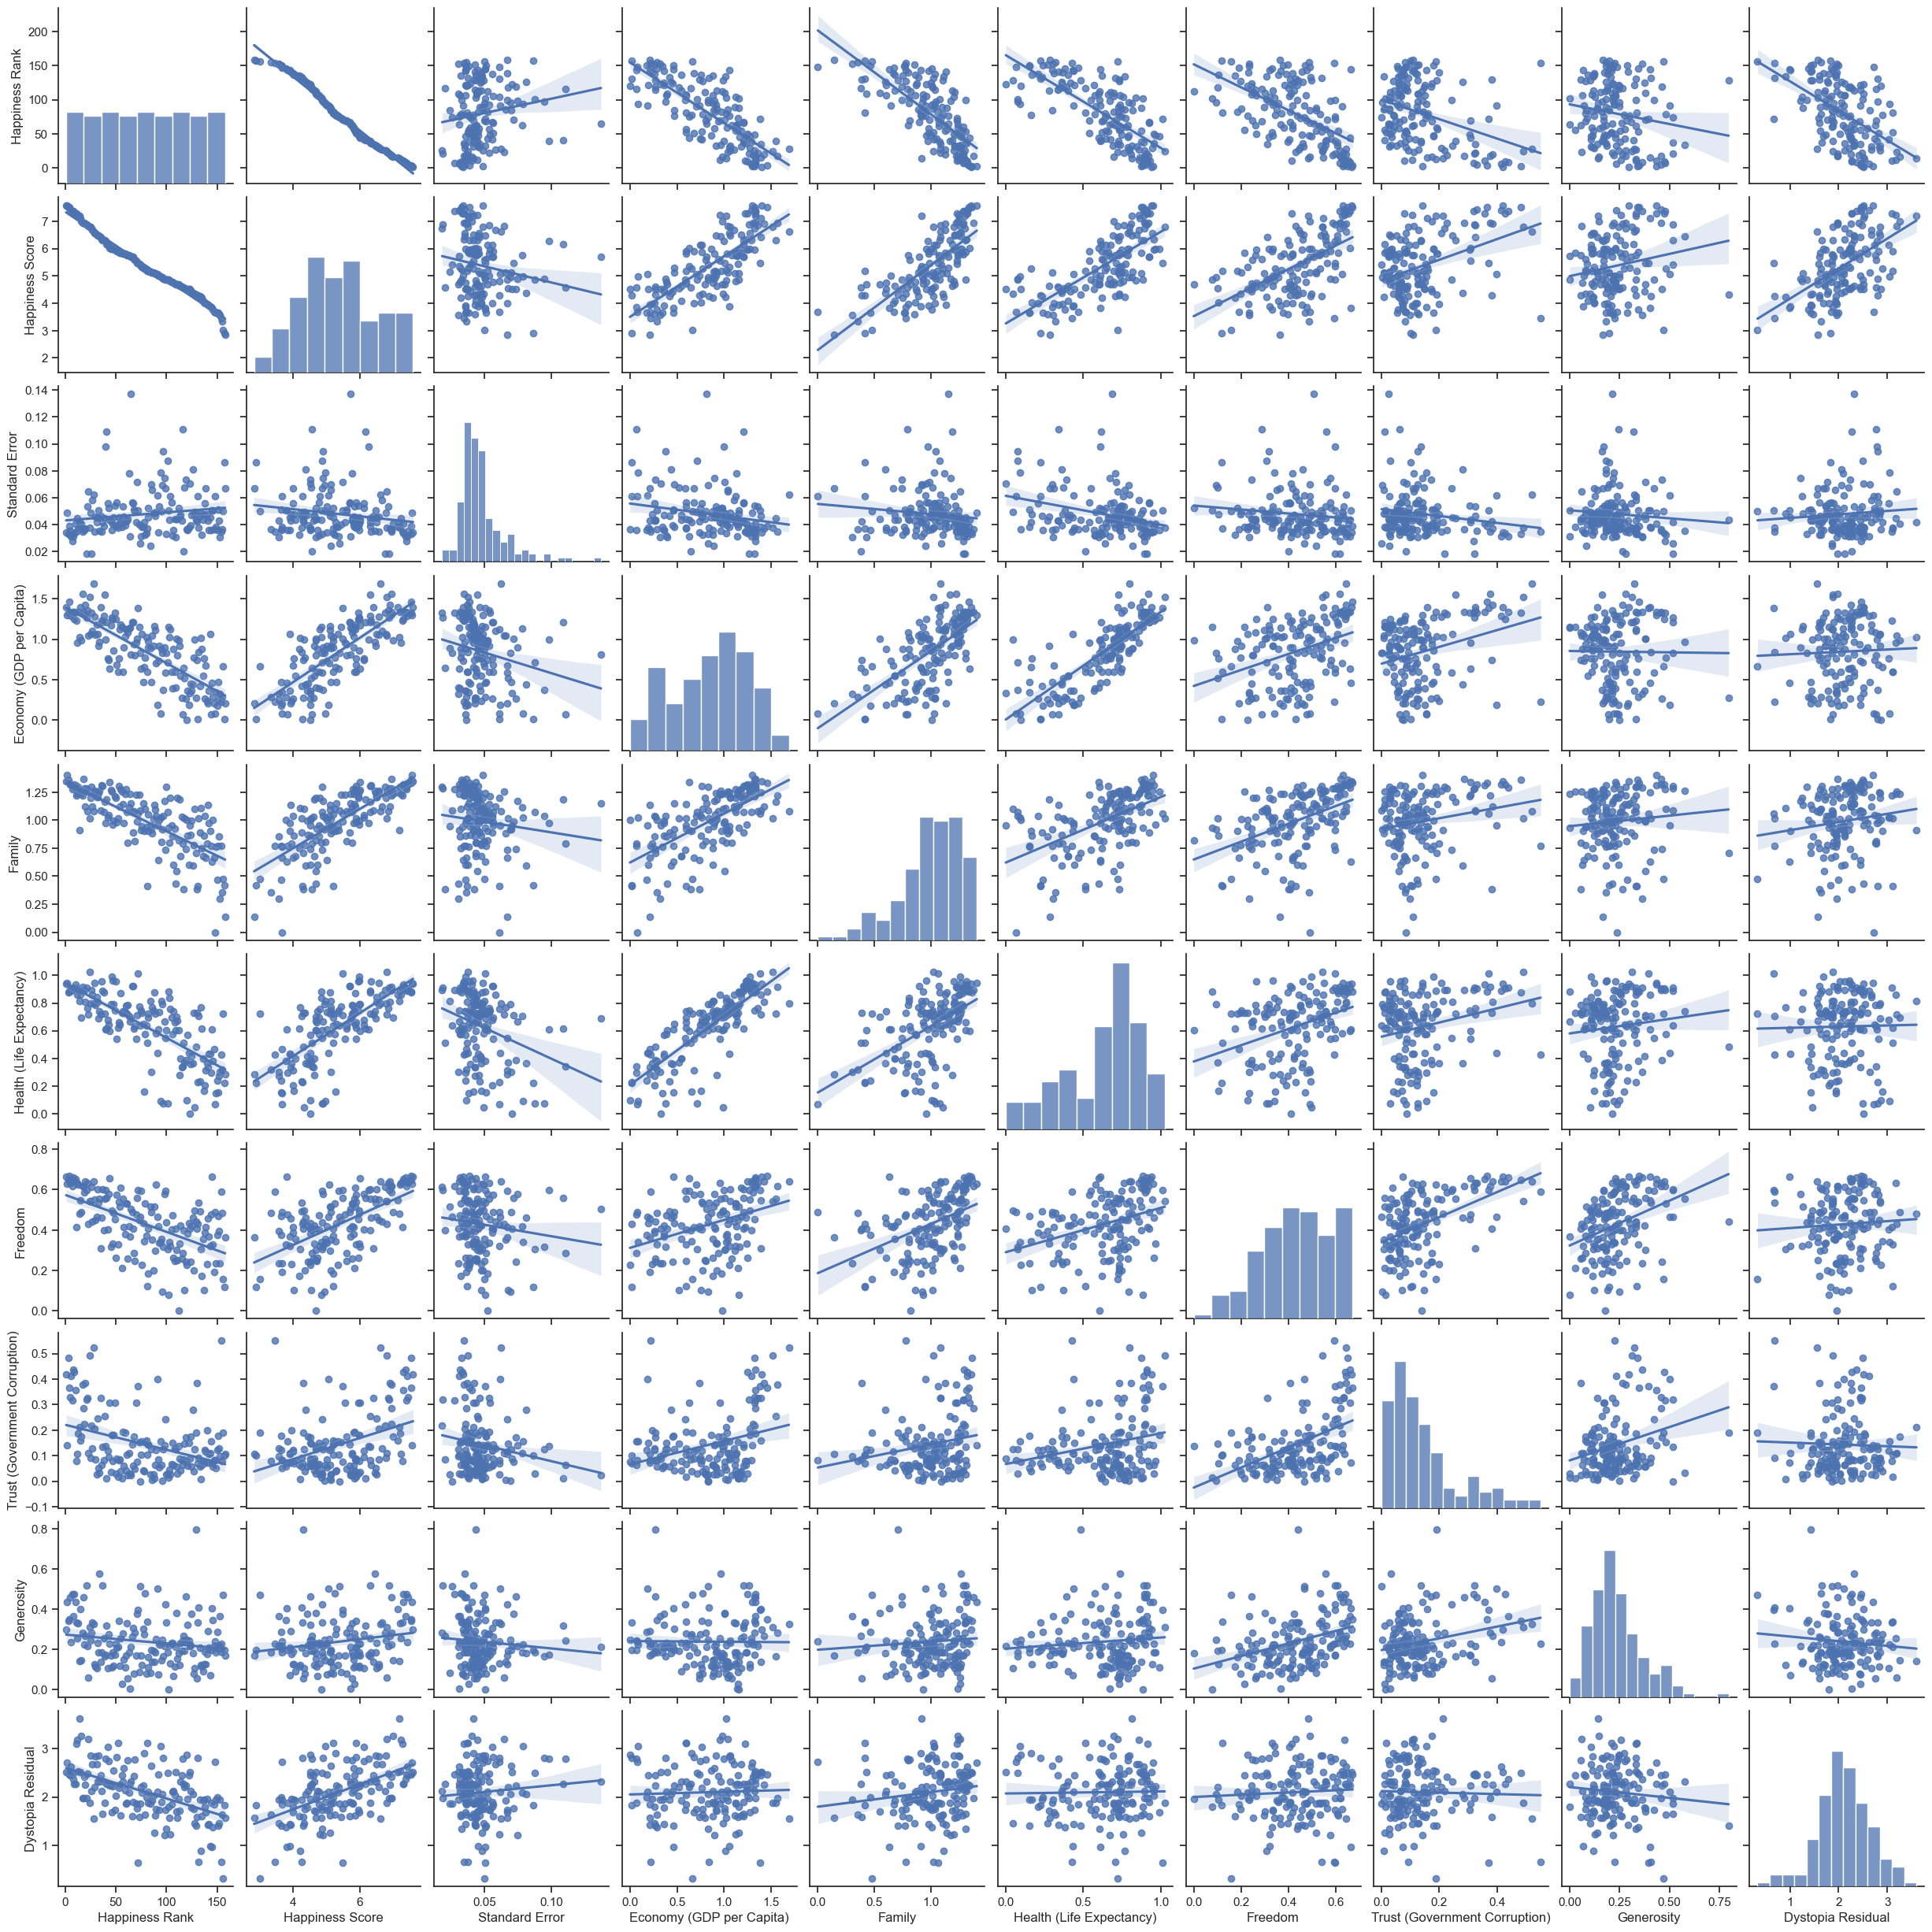

In [13]:
sns.set(style="ticks",color_codes=True)
g=sns.pairplot(data,kind="reg")

C:\Users\Dell\AppData\Local\Temp\ipykernel_1328\4244033118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

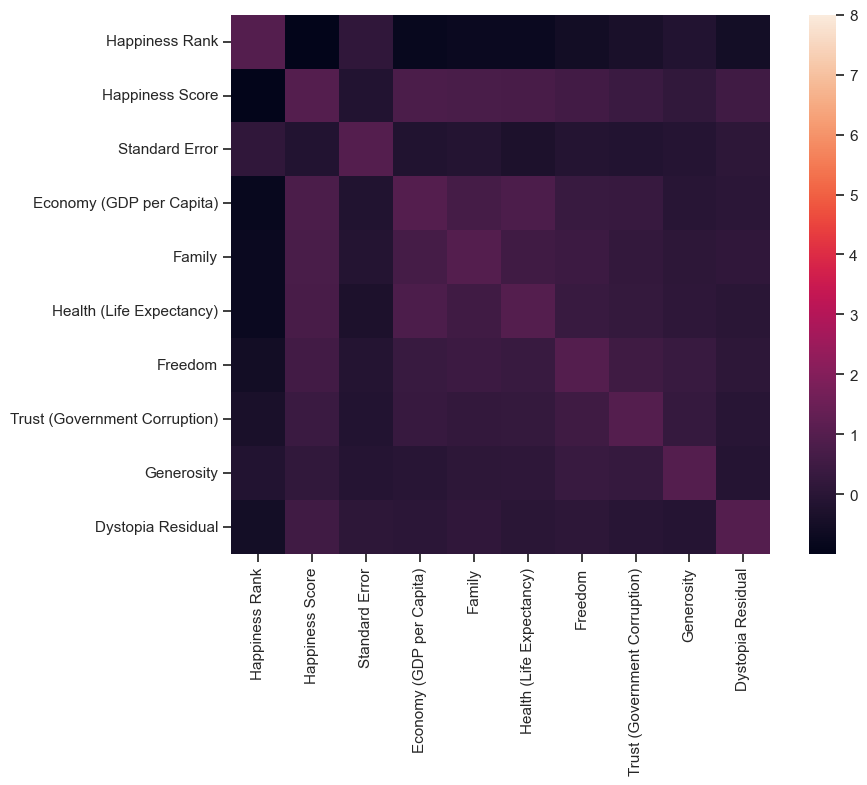

In [14]:
corrmat=data.corr()
sns.heatmap(corrmat,vmax=8,square=True)

In [21]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = dict(type = 'choropleth', 
           locations = data['Country'],
           locationmode = 'country names',
           z = data['Happiness Score'], 
           text = data['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness 2015', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'type' property of layout.geo.projection
        Received value: 'Mercator'

    The 'type' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['airy', 'aitoff', 'albers', 'albers usa', 'august',
            'azimuthal equal area', 'azimuthal equidistant', 'baker',
            'bertin1953', 'boggs', 'bonne', 'bottomley', 'bromley',
            'collignon', 'conic conformal', 'conic equal area', 'conic
            equidistant', 'craig', 'craster', 'cylindrical equal
            area', 'cylindrical stereographic', 'eckert1', 'eckert2',
            'eckert3', 'eckert4', 'eckert5', 'eckert6', 'eisenlohr',
            'equirectangular', 'fahey', 'foucaut', 'foucaut
            sinusoidal', 'ginzburg4', 'ginzburg5', 'ginzburg6',
            'ginzburg8', 'ginzburg9', 'gnomonic', 'gringorten',
            'gringorten quincuncial', 'guyou', 'hammer', 'hill',
            'homolosine', 'hufnagel', 'hyperelliptical',
            'kavrayskiy7', 'lagrange', 'larrivee', 'laskowski',
            'loximuthal', 'mercator', 'miller', 'mollweide', 'mt flat
            polar parabolic', 'mt flat polar quartic', 'mt flat polar
            sinusoidal', 'natural earth', 'natural earth1', 'natural
            earth2', 'nell hammer', 'nicolosi', 'orthographic',
            'patterson', 'peirce quincuncial', 'polyconic',
            'rectangular polyconic', 'robinson', 'satellite', 'sinu
            mollweide', 'sinusoidal', 'stereographic', 'times',
            'transverse mercator', 'van der grinten', 'van der
            grinten2', 'van der grinten3', 'van der grinten4',
            'wagner4', 'wagner6', 'wiechel', 'winkel tripel',
            'winkel3']

In [26]:
sns.boxplot(x='Region',y='Happiness Score',data=data)
plt.title('Regional Differences in Happiness')
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret input 'Region'